In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Download pret-trained YOLOv8n model
!pip install --upgrade ultralytics
from ultralytics import YOLO

# Load the YOLOv8n model
model = YOLO('yolov8n.pt')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Inputs to the Yolo network:

Images are of different sizes such as:

768 X 1024 pixels

1024 X 768 pixels

1024 X 683 pixels

Do we resize the images? In fact, Yolo will do that once we specify the image size in config params:
INPUT_WIDTH = 640
INPUT_HEIGHT = 640

Outputs of the Yolo network:

There is only 1 class i.e. the name plate of the vehicle. There are only two possibilities, either the name plate is present in the box or not present and this is covered by the Confidence score. Thus no output is needed for the class. If confidence score is 1, it means that name plate is present in the box. If confidence score is 0, it means that name plate is NOT present in the box. Thus Confidence score and 4 parameters representing bounding box, are the total 5 outputs of the network.

In [ ]:
# Config for the model
import cv2
import numpy as np

# input image width and height
INPUT_WIDTH = 640
INPUT_HEIGHT = 640
#[0.9 , bb1,bb2,bb3,bb4, pc1, pc2,....,pc80]
# probability threshold to filter boxes with object or no object
OBJECT_SCORE_THRESHOLD = 0.5
#3 Feature Maps -> SxS grids -> 3 Anchor boxes
# # probability threshold to detect and Assign Class
CLASS_CONFIDENCE_THRESHOLD = 0.45

# IOU AREA Threshold to suppress redundant boxes using NMS
NMS_THRESHOLD = 0.45 #Non Max

# Text parameters used for annotating label on Image
FONT_FACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.4
THICKNESS = 1
BOX_COLOR = (0,255,255)
FONT_COLOR= (0,0,0)


In [ ]:
# Train the model
model = YOLO("yolov8n.pt")
results = model.train(data="dataset.yaml", epochs=10, imgsz=640, batch=-1)

Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

In [ ]:
# Print metrics for the trained model
print(results)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b4c95f0d4c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# Function to predict bounding box using the model
def predict_bbox(filename):
  #source = '/content/drive/MyDrive/License/images/test/0cacb08195a3e2d7.jpg'

  results = model.predict(filename, save=True, conf=0.5)

  return results[0].boxes
  #print(boxes)

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to show bounding box on the image
def show_bbox(filename, boxes):

  # Get coordinates of bounding box
  coords = boxes[0].xyxy[0].tolist()
  x1, y1, x2, y2 = [round(x) for x in coords]

  # Read image
  image = cv2.imread(filename)

  # OpenCV reads in BGR, matplotlib displays in RGB
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Draw box (ensure it's on the RGB image if you converted it)
  cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

  # Display
  plt.imshow(image_rgb)
  plt.axis('off') # Hide axes
  plt.show()

In [ ]:
# Function to apply Gaussian blur
def apply_gaussian_blur(filename, boxes):

  # Get coordinates of bounding box
  coords = boxes[0].xyxy[0].tolist()
  x1, y1, x2, y2 = [round(x) for x in coords]

  x1= 10
  x2 = 20
  y1 = 10
  y2 = 20

  # Read image
  image = cv2.imread(filename)

  # Extract the ROI from the image
  roi = image[y1:y2, x1:x2]

  # Apply Gaussian blur to the ROI
  blurred_roi = cv2.GaussianBlur(roi, (11, 11), 0)

  image[y1:y2, x1:x2] = blurred_roi

  # Display the image with the blurred ROI
  plt.imshow(image)
  plt.axis('off')
  plt.show()


image 1/1 /content/drive/MyDrive/License/images/test/0cacb08195a3e2d7.jpg: 448x640 1 class_0, 165.2ms
Speed: 3.2ms preprocess, 165.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict


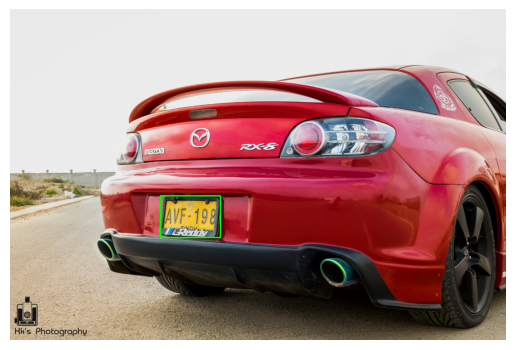

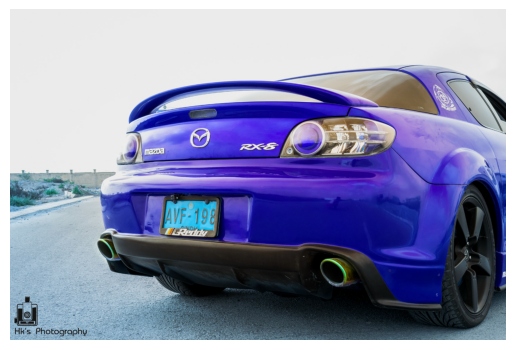

In [ ]:
# Test file 1
filename = '/content/drive/MyDrive/License/images/test/0cacb08195a3e2d7.jpg'
boxes = predict_bbox(filename)
show_bbox(filename, boxes)
apply_gaussian_blur(filename, boxes)

Please note that the first image shows correct bounding box (green color) around number plate. The 2nd image was an attempt to blur the plate using same box coordinates, but the code snippet actually affects the entire image (which even TA tried to look at). We tried another library for blurring, still did not succeed.

Similarly, for next all test images, the bounding box is clearly visible, but the blurring part (2nd image) is not successful.


image 1/1 /content/drive/MyDrive/License/images/test/0e50ea14c4fc1353.jpg: 448x640 1 class_0, 509.2ms
Speed: 29.4ms preprocess, 509.2ms inference, 13.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict


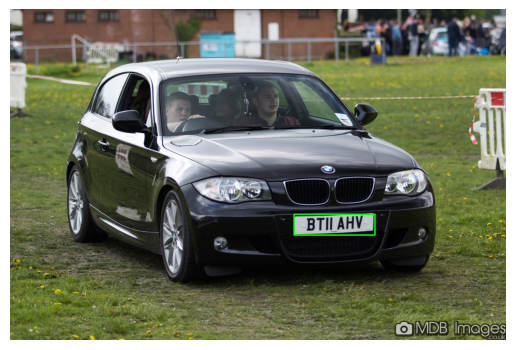

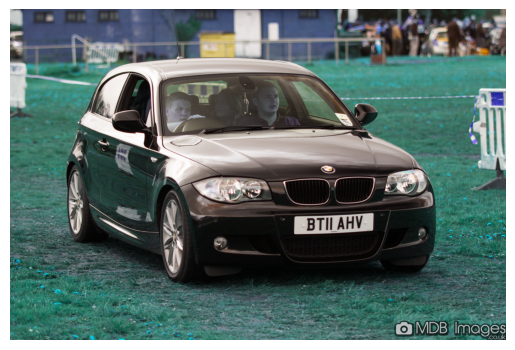

In [ ]:
# Test file 2
filename = '/content/drive/MyDrive/License/images/test/0e50ea14c4fc1353.jpg'
boxes = predict_bbox(filename)
show_bbox(filename, boxes)
apply_gaussian_blur(filename, boxes)


image 1/1 /content/drive/MyDrive/License/images/test/0c756c9366a8cb10.jpg: 480x640 1 class_0, 193.1ms
Speed: 3.7ms preprocess, 193.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict


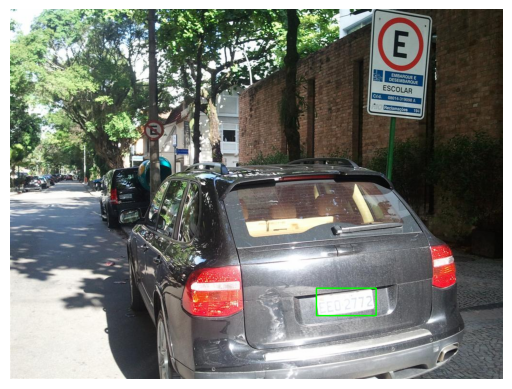

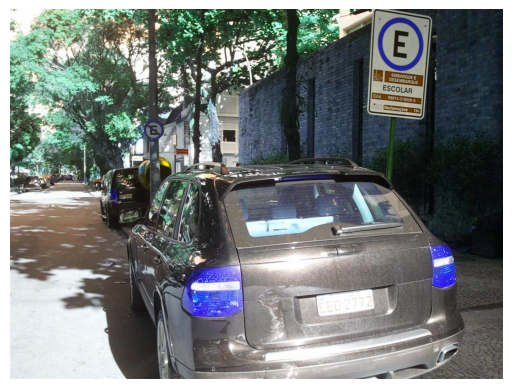

In [ ]:
# Test file 3
filename = '/content/drive/MyDrive/License/images/test/0c756c9366a8cb10.jpg'
boxes = predict_bbox(filename)
show_bbox(filename, boxes)
apply_gaussian_blur(filename, boxes)


image 1/1 /content/drive/MyDrive/License/images/test/0f4bfc46402a9f52.jpg: 640x640 1 class_0, 454.6ms
Speed: 6.5ms preprocess, 454.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


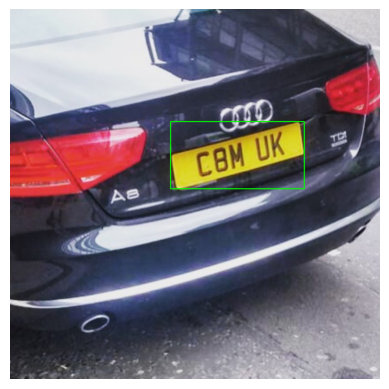

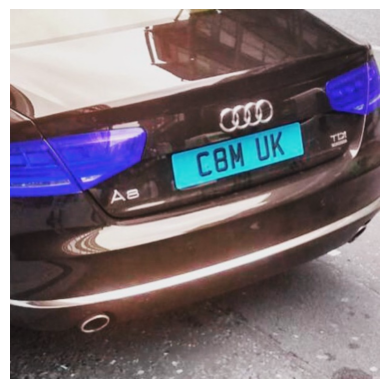

In [ ]:
# Test file 4
filename = '/content/drive/MyDrive/License/images/test/0f4bfc46402a9f52.jpg'
boxes = predict_bbox(filename)
show_bbox(filename, boxes)
apply_gaussian_blur(filename, boxes)


image 1/1 /content/drive/MyDrive/License/images/test/0f0596b1c511e071.jpg: 576x640 1 class_0, 289.6ms
Speed: 6.0ms preprocess, 289.6ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)
Results saved to /content/runs/detect/predict


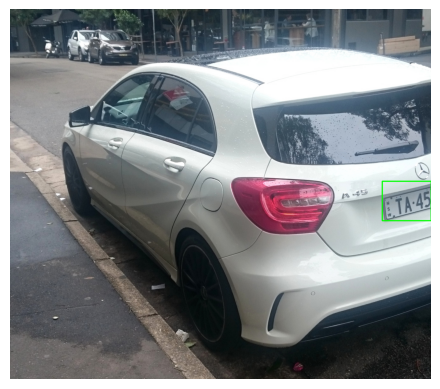

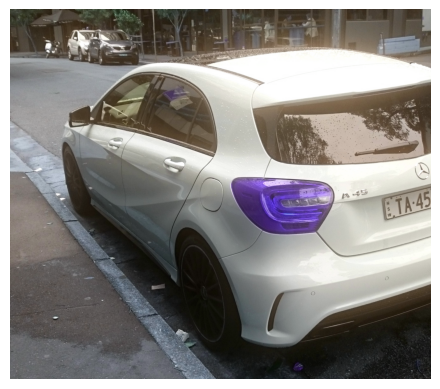

In [ ]:
# Test file 5
filename = '/content/drive/MyDrive/License/images/test/0f0596b1c511e071.jpg'
boxes = predict_bbox(filename)
show_bbox(filename, boxes)
apply_gaussian_blur(filename, boxes)

The yolo model was trained on 345 images due to execution time constraints. Looks like it is predicting bounding box well. Will explore blurring part in future, if TA can guide. Thanks to all help so far from TA, who made the project succesful.